## K Means Clustering Implementation 

In this K Means Clustering we are going to cluster a list of words which have been used in multiple NIPS conference papers published between 1987 and 2015.<br/><br/>
The dataset is in the form of a 11463 x 5812 matrix of word counts, containing 11463 words and 5811 NIPS conference papers (the first column contains the list of words). Each column contains the number of times each word appears in the corresponding document. The names of the columns give information about each document and its timestamp in the following format: Xyear_paperID.
<br/><br/>
The document-term matrix was constructed after tokenization, removal of stopwords and truncation of the vocabulary by only keeping words occurring more than 50 times.

### Import Libraries 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [42]:
# df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00371/NIPS_1987-2015.csv",header=0)
df = pd.read_csv("Mall_Customers.csv",header=0)

In [43]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploratory Data Analysis 

CustomerID is of no use in this case so we'll drop it. 

In [44]:
df.drop('CustomerID',axis=1,inplace=True)

In [45]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [50]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [49]:
# Checking Missing Values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [51]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Visualization 

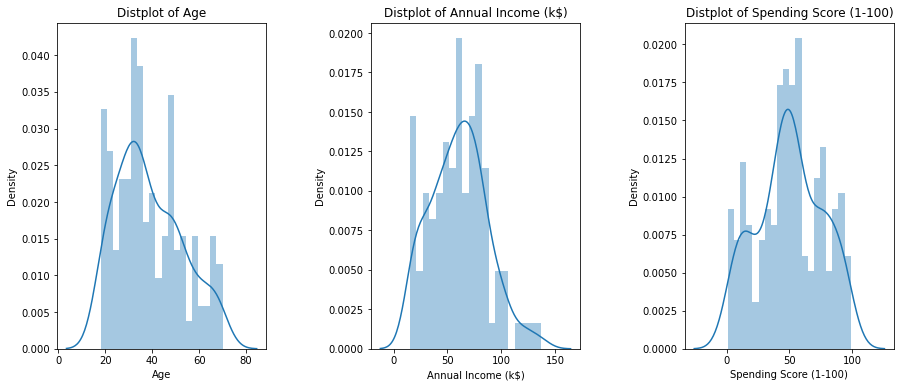

In [52]:
# Histograms

plt.figure(1,figsize = (15 , 6))
n=0

for x in ['Age','Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

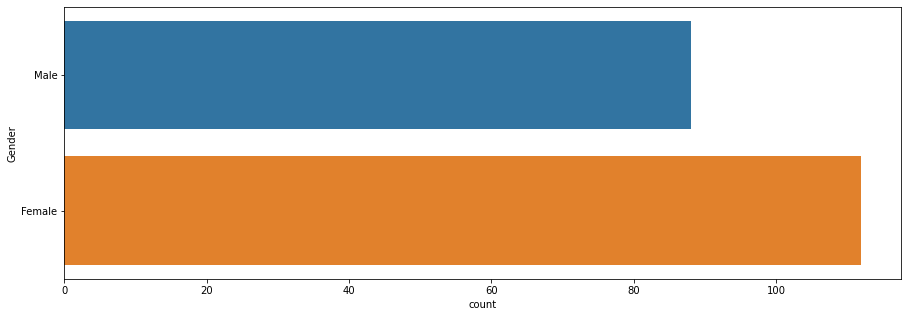

In [53]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

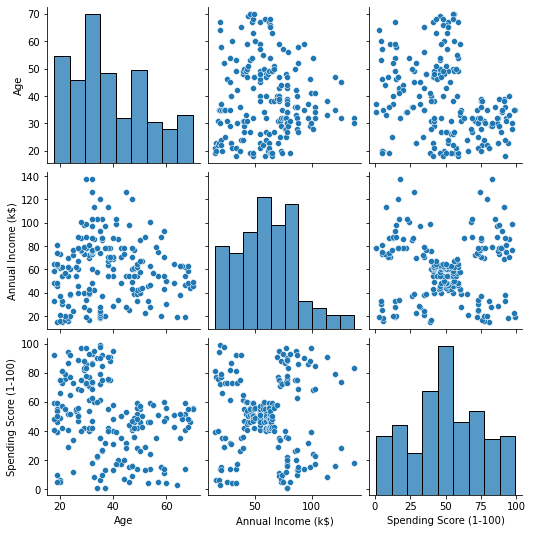

In [54]:
# Pair Plots
sns.pairplot(df)

### Distribution of values in Age , Annual Income and Spending Score according to Gender 

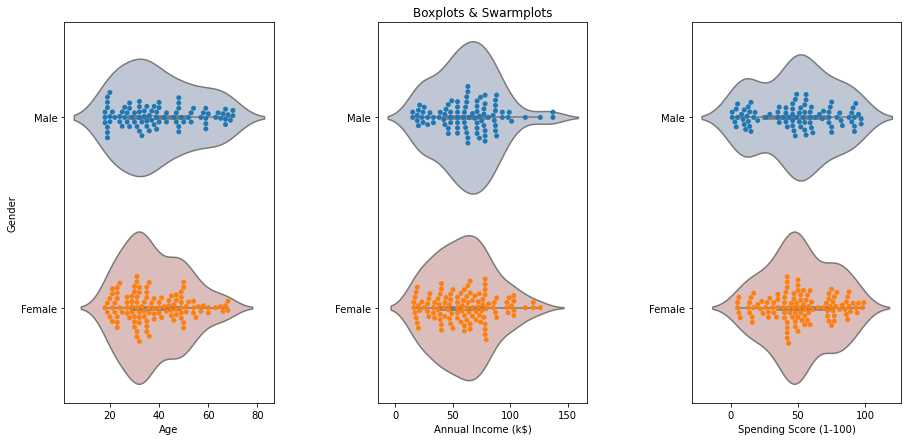

In [55]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

### Scale the Data 

In [56]:
Scaler = StandardScaler()
Scaled_df = Scaler.fit_transform(df.iloc[:,1:])

In [59]:
inertia = []
for n_cluster in range(1 , 20):
    kmeans = KMeans(n_clusters = n_cluster ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
    kmeans.fit(Scaled_df)
    inertia.append(kmeans.inertia_)

### Elbow Curve 

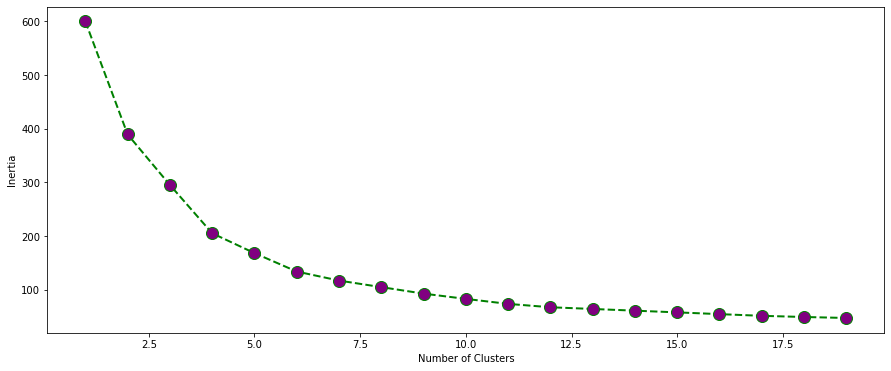

In [65]:
plt.figure(1 , figsize = (15 ,6))
# plt.plot(np.arange(1 , 20) , inertia , 'o')
plt.plot(np.arange(1 , 20) , inertia , color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12,markerfacecolor='purple')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
# Let's take k=6 and see how our clusters look

### Final Clustering 

In [66]:
kmeans = KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
kmeans.fit(Scaled_df)
inertia.append(kmeans.inertia_)

In [68]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [69]:
df['Labels'] = labels
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5
